## reference:
https://www.amazon.com/stores/Poornachandra-Sarang/author/B08PL7FBQZ?ref=ap_rdr&isDramIntegrated=true&shoppingPortalEnabled=true

## we want to simulate the behavior of the following equation: (predict z, if given the features x & y)
# z = 7 * x + 6 * y + 5

In [55]:
#import tf
import tensorflow as tf

In [56]:
#print version
print (tf.__version__)

2.17.0


In [57]:
from tensorflow import keras

In [58]:
# pip install numpy
import numpy as np
import matplotlib.pyplot as plt

# Setting Up Data


In [59]:
number_of_datapoints = 100

In [60]:
# generate random x values in the range -5 to +5
x=  np.random.uniform(low = -5 , high = 5 ,
size = (number_of_datapoints, 1))

In [61]:
x[:5,:].round(2)


array([[-0.72],
       [-1.32],
       [ 2.76],
       [-1.13],
       [ 4.78]])

In [62]:
y = np.random.uniform(-5 , 5 , size = (number_of_datapoints , 1))


In [63]:
y[:5,:].round(2)


array([[ 3.1 ],
       [-3.67],
       [ 4.53],
       [-2.7 ],
       [-0.01]])

In [64]:
z= 7*x + 6*y +5

In [65]:
# add some noise
noise = np.random.uniform(low =-1 , high =1,
 size = (number_of_datapoints, 1))

In [66]:
#making a sigle dimention input
input = np.column_stack((x,y))
input[:5,:].round(2)


array([[-0.72,  3.1 ],
       [-1.32, -3.67],
       [ 2.76,  4.53],
       [-1.13, -2.7 ],
       [ 4.78, -0.01]])

# Defining Neural Network


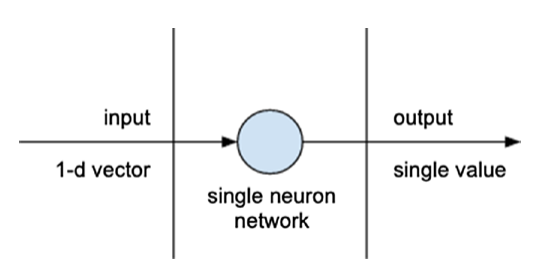

In [67]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2])])

# Compiling Model
 * loss function
 * Optimizer
 * metrics

In [68]:
model.compile(optimizer ='sgd',
             loss='mean_squared_error',
             metrics=['mse'])

# Training Network


In [69]:
from tensorflow.keras.callbacks import History
history=History()

In [70]:
model.fit(input, z,epochs =15, verbose =1,
         validation_split=0.2 , callbacks=[history])
# input is the x and y
# z is the target
# epochs is the number of iterations
# verbos=1 means we want toobserve the training progress
# validation_split=0.2 shows the percentage of data used for validatin
# callbacks

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 591.3765 - mse: 591.3765 - val_loss: 171.9633 - val_mse: 171.9633
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 227.4105 - mse: 227.4105 - val_loss: 59.1842 - val_mse: 59.1842
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 87.5271 - mse: 87.5271 - val_loss: 21.4762 - val_mse: 21.4762
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 35.4696 - mse: 35.4696 - val_loss: 12.7438 - val_mse: 12.7438
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20.3544 - mse: 20.3544 - val_loss: 11.9167 - val_mse: 11.9167
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.5790 - mse: 13.5790 - val_loss: 11.7024 - val_mse: 11.7024
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.1794 - mse: 11.1794 - val_loss: 10.9367 - val_mse: 10.9367
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.6432 - mse: 9.6432 - val_loss: 10.2085 - val_mse: 10.2085
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms

# What Are Callbacks?
* Callbacks are functions that are called at specific stages during the training process. 
* They allow you to monitor the model's performance, make decisions, and take actions at certain points in the training loop.  *For example, you can use callbacks to:

* Save the model's weights during or after training.
* Stop training early if the model is no longer improving (EarlyStopping).
* Adjust the learning rate dynamically (LearningRateScheduler).
* Monitor metrics like loss and accuracy after each epoch or batch

# Examining Training Output


In [72]:
# we have asked the model to save the status at each epoch in a history variable.

print(history.history.keys())


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


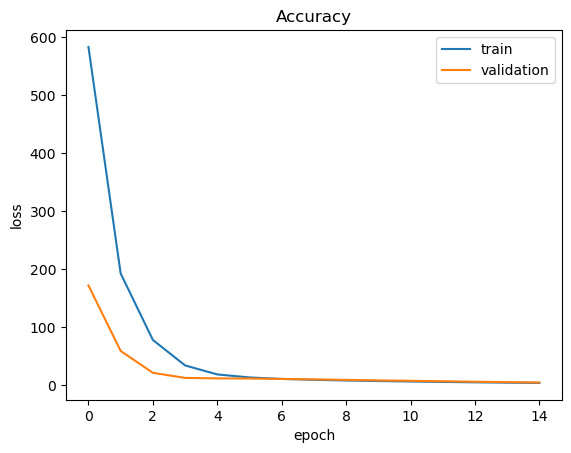

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

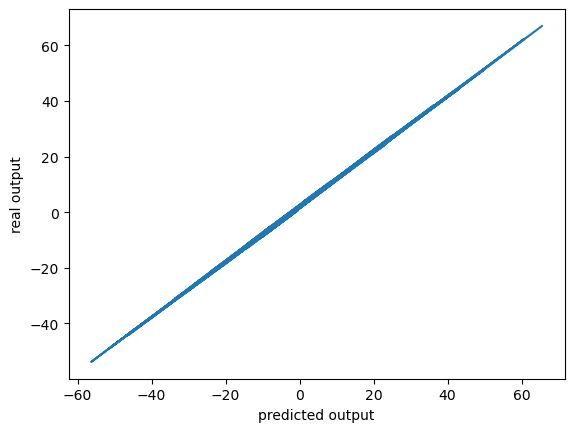

In [92]:
plt.plot(np.squeeze(model.predict_on_batch(input)), 
np.squeeze(z))
plt.xlabel('predicted output')
plt.ylabel('real output')
plt.show()

In [98]:
print("Predicted z for x=2, y=3 ---> ", model.predict( np.array([[2, 3]])))
# # z = 7 * x + 6 * y + 5--> real: 14+18+5= 37

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted z for x=2, y=3 --->  [[35.38315]]


In [99]:
14+18+5

37